# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('sinasc_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [4]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [24]:
#usar o groupby para o cálculo

df_1 = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'munResNome']]
df_1_media = df_1.groupby(by='munResNome').mean().round(0)
df_1_media.head()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,26.0,30.0
Alto Alegre dos Parecis,25.0,29.0
Alto Paraíso,25.0,29.0
Alvorada D'Oeste,26.0,31.0
Ariquemes,26.0,32.0


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [25]:
# mostra qual o tipo de dados da coluna DTNASC

print(sinasc_raw['DTNASC'].dtype)

object


In [46]:
# cria um df baseado no data do meu aniversário
df_2 = sinasc_raw[sinasc_raw['DTNASC']=='2019-04-01']

# agrupa os dados pela escolaridade de mãe e sexo e retorna a média do peso
table = pd.pivot_table(df_2, values='PESO', index=['ESCMAE'], columns=['SEXO']).round(2)

table

SEXO,Feminino,Masculino
ESCMAE,,
12 anos ou mais,3143.57,3493.33
4 a 7 anos,3207.14,3467.50
8 a 11 anos,3188.10,3297.59


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [72]:
df_2 = sinasc_raw.groupby(['munResNome']).count()
df_2.sort_values(by='ORIGEM',ascending=True)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea
munResNome,,,,,,,,,,,,,,,,,,,,,
Município ignorado - RO,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
Castanheiras,32,32,32,32,32,32,32,30,32,32,...,32,32,32,32,32,32,32,32,32,32
Pimenteiras do Oeste,40,40,40,40,40,40,40,38,40,40,...,40,40,40,40,40,40,40,40,40,40
Primavera de Rondônia,43,43,43,43,43,43,43,12,43,43,...,43,43,43,43,43,43,43,43,43,43
Parecis,44,44,44,44,44,44,44,34,43,42,...,44,44,44,44,44,44,44,44,44,44
Rio Crespo,50,50,50,50,50,49,49,48,47,47,...,50,50,50,50,50,50,50,50,50,50
São Felipe D'Oeste,54,54,54,54,54,54,54,31,53,53,...,54,54,54,54,54,54,54,54,54,54
Teixeirópolis,64,64,64,64,64,64,64,58,64,64,...,64,64,64,64,64,64,64,64,64,64
Cacaulândia,75,75,75,75,75,74,74,72,75,74,...,75,75,75,75,75,75,75,75,75,75


In [77]:
# cria uma pivot table com apenas o nome do munícipio menos citado acima

a = sinasc_raw['munResNome']=='Castanheiras'

table_1 = pd.pivot_table(sinasc_raw[a], 
               values=['IDADEMAE','IDADEPAI'], 
               index=['munResNome'], 
               aggfunc={
                   'IDADEMAE':[np.max, np.min, np.mean],
                   'IDADEPAI':[np.max, np.min, np.mean]
               }
                        )
    
table_1

IDADEMAE                IDADEPAI                 
                 amax amin      mean     amax  amin       mean
munResNome                                                    
Castanheiras       39   17  27.28125     43.0  17.0  30.392857

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [18]:
# converte a coluna DTNASC em datetime

df_3 = sinasc_raw.copy()

df_3['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

df_3['MES'] = df_3['DTNASC'].dt.month

In [82]:
df_marco = df_3[df_3['MES']==3]

In [85]:
df_marco.groupby(by='munResNome').count().sort_values(by='ORIGEM',ascending=True).head(1)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea,MES
munResNome,,,,,,,,,,,,,,,,,,,,,
Teixeirópolis,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [86]:
b = sinasc_raw['munResNome']=='Teixeirópolis'

table_2 = pd.pivot_table(sinasc_raw[a], 
               values=['QTDFILVIVO','IDADEMAE','IDADEPAI'], 
               index=['munResNome'], 
               aggfunc={
                   'QTDFILVIVO':[np.max, np.min, np.mean],
                   'IDADEMAE':[np.max, np.min, np.mean],
                   'IDADEPAI':[np.max, np.min, np.mean]
               }
                        )
    
table_2

IDADEMAE                IDADEPAI                  QTDFILVIVO  \
                 amax amin      mean     amax  amin       mean       amax   
munResNome                                                                  
Castanheiras       39   17  27.28125     43.0  17.0  30.392857        6.0   

                           
             amin    mean  
munResNome                 
Castanheiras  0.0  1.0625

### Alguns teste

In [99]:
table_3 = pd.pivot_table(sinasc_raw, 
               values=['QTDFILVIVO','QTDFILMORT','IDADEMAE','IDADEPAI','PESO'], 
               index=['munResNome'], 
               aggfunc={
                   'PESO':[np.max, np.min, np.mean],
                   'QTDFILMORT':[np.max, np.min, np.mean],
                   'QTDFILVIVO':[np.max, np.min, np.mean],
                   'IDADEMAE':[np.max, np.min, np.mean],
                   'IDADEPAI':[np.max, np.min, np.mean]
               }
                        )
    
table_3

IDADEMAE                 IDADEPAI                   \
                              amax amin       mean     amax  amin       mean   
munResNome                                                                     
Alta Floresta D'Oeste           53   14  25.991826     58.0  17.0  29.548701   
Alto Alegre dos Parecis         41   14  24.844156     50.0  16.0  29.179104   
Alto Paraíso                    42   11  24.960177     49.0  21.0  28.833333   
Alvorada D'Oeste                44   15  25.770732     52.0  17.0  30.757282   
Ariquemes                       44   13  25.607866     51.0  20.0  32.466667   
Buritis                         44   14  25.559177     49.0  18.0  30.812500   
Cabixi                          39   13  26.037500     47.0  19.0  34.333333   
Cacaulândia                     42   16  25.546667     50.0  28.0  36.333333   
Cacoal                          47   14  26.890102     66.0  17.0  30.931854   
Campo Novo de Rondônia          40   13  24.825301     40.0  21.0  30.500000   
Candeias do Jamari              45   14  25.243323     41.0  21.0  29.894737   
Castanheiras                    39   17  27.281250     43.0  17.0  30.392857   
Cerejeiras                      53   15  27.240506     52.0  19.0  31.652778   
Chupinguaia                     42   13  25.333333     46.0  20.0  29.629630   
Colorado do Oeste               47   15  27.602804     53.0  23.0  34.354839   
Corumbiara                      43   15  24.716535     52.0  21.0  32.470588   
Costa Marques                   41   12  24.412017     60.0  17.0  30.613636   
Cujubim                         42   14  24.482927     44.0  19.0  31.400000   
Espigão D'Oeste                 44   14  26.093333     86.0  16.0  31.198113   
Governador Jorge Teixeira       41   13  24.401786     37.0  22.0  29.222222   
Guajará-Mirim                   43   13  25.462228     44.0  19.0  30.470588   
Itapuã do Oeste                 46   15  26.064220     73.0  25.0  42.500000   
Jaru                            45   12  25.982974     62.0  19.0  32.197183   
Ji-Paraná                       44   12  26.361137     63.0  15.0  31.132239   
Machadinho D'Oeste              44   13  25.480000     53.0  17.0  31.326923   
Ministro Andreazza              44   17  27.904762     55.0  21.0  33.849315   
Mirante da Serra                46   14  26.304878     56.0  20.0  32.154762   
Monte Negro                     40   14  25.648241     55.0  20.0  34.678571   
Município ignorado - RO         24   24  24.000000     22.0  22.0  22.000000   
Nova Brasilândia D'Oeste        51   15  26.222222     48.0  20.0  30.520833   
Nova Mamoré                     46   14  25.326389     43.0  19.0  31.692308   
Nova União                      39   16  26.894231     53.0  18.0  31.371429   
Novo Horizonte do Oeste         41   15  26.938776     56.0  20.0  31.588235   
Ouro Preto do Oeste             44   14  26.375594     60.0  17.0  31.233244   
Parecis                         41   16  26.454545     61.0  18.0  32.473684   
Pimenta Bueno                   47   13  25.199675     70.0  16.0  29.745174   
Pimenteiras do Oeste            40   14  25.075000     45.0  25.0  35.600000   
Porto Velho                     47   12  26.312670     65.0  16.0  32.352679   
Presidente Médici               44   14  25.796053     64.0  16.0  30.150754   
Primavera de Rondônia           39   16  27.023256     44.0  21.0  31.888889   
Rio Crespo                      39   16  26.660000     28.0  28.0  28.000000   
Rolim de Moura                  44   14  26.600863     69.0  16.0  30.360479   
Santa Luzia D'Oeste             41   15  26.121212     53.0  18.0  30.703297   
Seringueiras                    42   14  24.910714     47.0  20.0  30.500000   
São Felipe D'Oeste              41   17  26.481481     57.0  18.0  31.395833   
São Francisco do Guaporé        41   14  25.660066     54.0  19.0  31.638889   
São Miguel do Guaporé           42   14  25.926346     60.0  19.0  32.666667   
Teixeirópolis             

Text(0, 0.5, 'QTDFILMORT MEDIA')

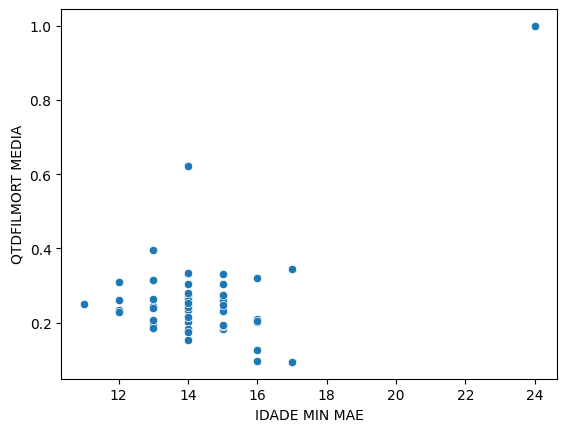

In [107]:
x = table_3['IDADEMAE']['amin']
y = table_3['QTDFILMORT']['mean']

sns.scatterplot(data=table_3, x=x, y=y)
plt.xlabel('IDADE MIN MAE')
plt.ylabel('QTDFILMORT MEDIA')

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

- Quando a idade mínima das mães é menor do que 18, a quantidade média de filhos mortos aumenta significativamente.